In [3]:
#!pip install contextily
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import folium
import pandas as pd
import urllib3
from zipfile import ZipFile
import requests
import osmnx as ox
import networkx as nx

%matplotlib inline

<ipython-input-4-214c59b7cd8b>:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


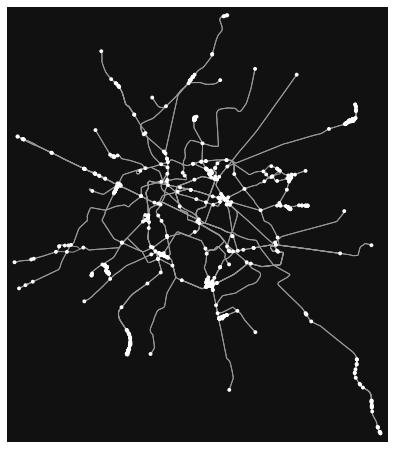

In [4]:
# 配置osmnx
ox.config(use_cache=True, log_console=True)

# 定义巴黎的中心点坐标
paris_location = (48.8566, 2.3522)

# 获取巴黎地铁线路的网络数据
# network_type='all'将会获取所有类型的道路，包括步行街和自行车道
# 但是我们可以通过custom_filter来指定只获取地铁线路
# '["railway"~"subway"]'是一个过滤器，它将只选择railway属性为subway的线路
metro_network = ox.graph_from_point(paris_location, dist=10000, dist_type='bbox', network_type='all', custom_filter='["railway"~"subway"]')

# 绘制网络图
fig, ax = ox.plot_graph(metro_network)
plt.show()

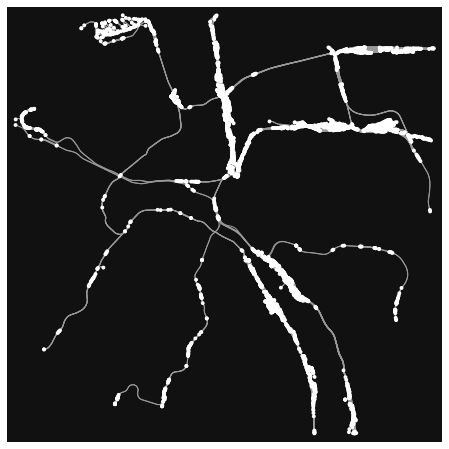

In [5]:
RER_network = ox.graph_from_point(paris_location, dist=10000, dist_type='bbox', network_type='all', custom_filter='["railway"~"rail"]')

# 绘制网络图
fig, ax = ox.plot_graph(RER_network)
plt.show()

In [19]:
# Define the location and network type
place_name = "Paris, France"
network_type = 'all'
custom_filter = '["railway"~"subway"]'

# Create the graph from OSM data
metro_network = ox.graph_from_place(place_name, network_type=network_type, custom_filter=custom_filter)

# Convert the graph to geodataframes
nodes, edges = ox.graph_to_gdfs(metro_network, nodes=True, edges=True)

# Create a folium map centered on Paris
m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# Define colors for metro lines
line_colors = {
    'Métro 1': 'blue',
    'Métro 2': 'red',
    'Métro 3': 'green',
    'Métro 4': 'purple',
    'Métro 5': 'orange',
    'Métro 6': 'turquoise',
    'Métro 7': 'pink',
    'Métro 8': 'lightgreen',
    'Métro 9': 'brown',
    'Métro 10': 'lightblue',
    'Métro 11': 'gold',
    'Métro 12': 'navy',
    'Métro 13': 'lavender',
    'Métro 14': 'magenta',
}

# Add metro stations to the map
for idx, row in nodes.iterrows():
    folium.CircleMarker(
        location=(row['y'], row['x']), 
        radius=3, 
        color='black', 
        fill=True
    ).add_to(m)

# Add metro lines to the map with different colors
for idx, row in edges.iterrows():
    geom = row['geometry']
    line_name = row['name'] if type(row['name']) == str else 'Unknown'  # 确保线路名称是字符串
    color = line_colors.get(line_name, 'grey')  # 使用定义好的颜色，如果找不到则默认为灰色

    if geom.geom_type == 'LineString':
        folium.PolyLine(
            locations=[(lat, lon) for lon, lat in geom.coords], 
            color=color, 
            weight=2
        ).add_to(m)
    elif geom.geom_type == 'MultiLineString':
        for line in geom:
            folium.PolyLine(
                locations=[(lat, lon) for lon, lat in line.coords], 
                color=color, 
                weight=2
            ).add_to(m)

# Save and show the map
m.save('paris_metro_stations_and_lines.html')
m
